In [6]:
# required all possible library
# 
import io
import os
import re
import shutil
import string
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from math import exp
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from  sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,confusion_matrix
from sklearn.model_selection import train_test_split
import tensorflow_hub as hub
import tensorflow_datasets as tfds
print(keras.__version__), print(tf.__version__),print(tf.test.is_built_with_cuda()),print(tf.test.is_built_with_gpu_support())
tfds.disable_progress_bar()
# usefull resizing image and for markup
import io
import os
import re
import shutil
import string

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
def image_resize_fun(img_path):
    import PIL

    # img_path = "/content/effiecient model performance graph.png"
    img = PIL.Image.open(img_path)
    im = img.size
    resized_im = img.resize((round(im[0]*0.5), round(im[1]*0.5)))
    resized_im.size,
    resized_im.show()
    resized_im.save("efficient_resized.png")

2.5.0
2.5.0
True
True


# RNN  and Time series data prediction

It is LSTM Layer in RNN

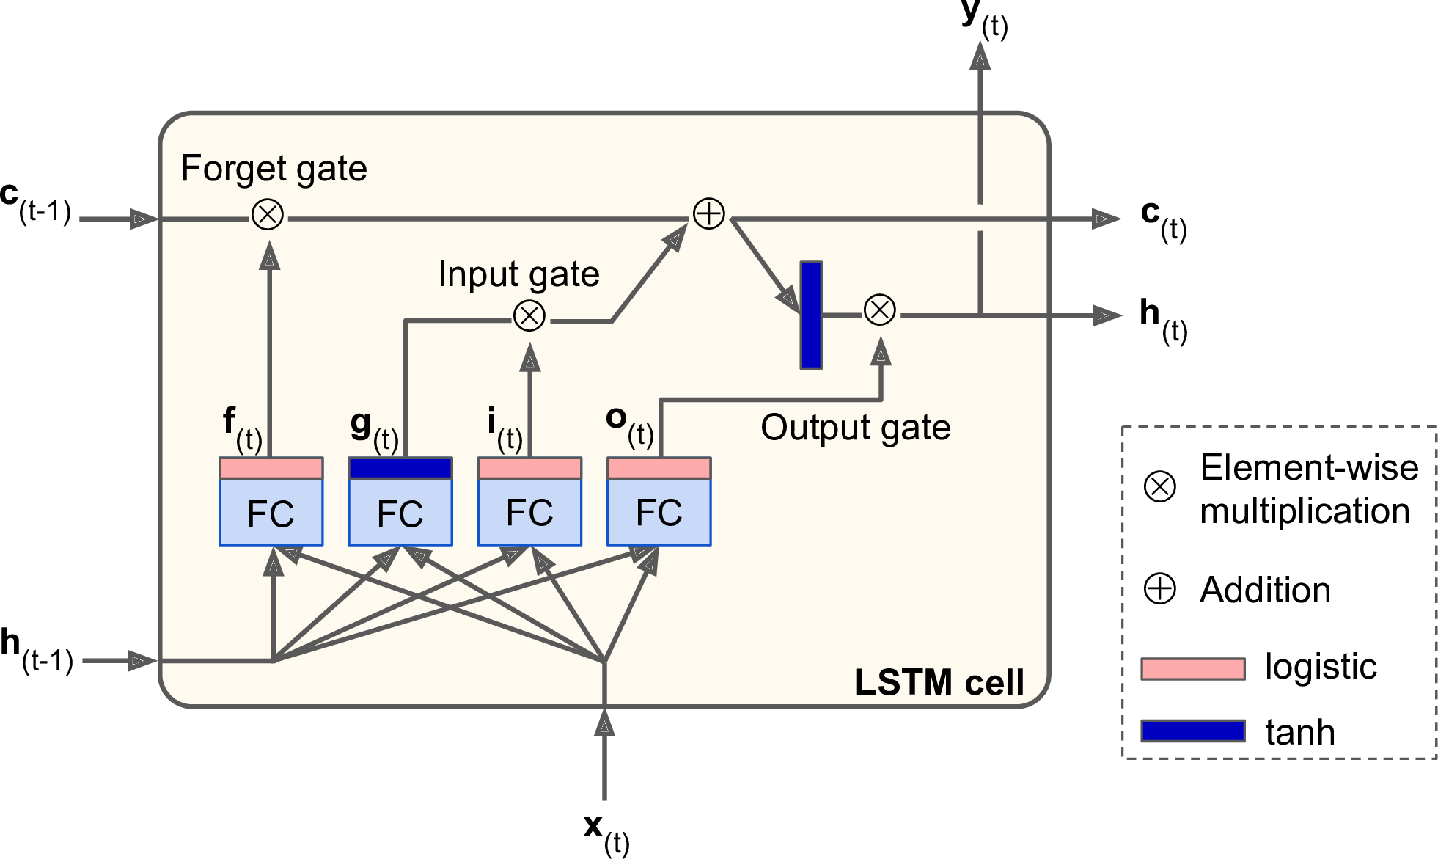

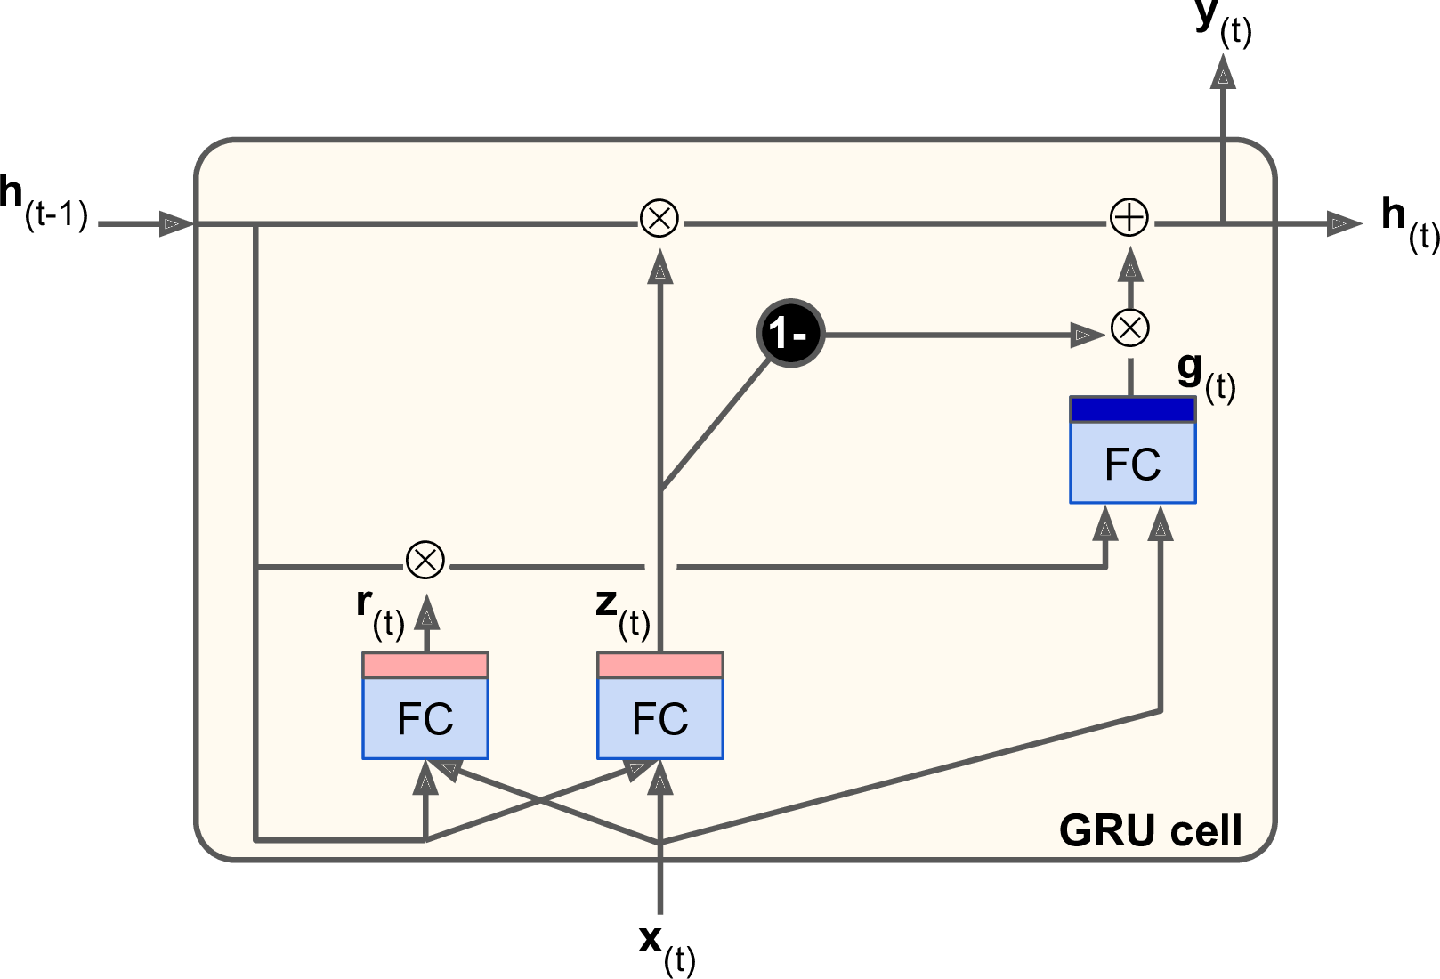

# Natural Language Processing and RNN
Using RNN archictecture for NLP tasks

In [ ]:
inputs = np.random.random([32, 10, 8]).astype(np.float32)
simple_rnn = tf.keras.layers.SimpleRNN(4)

output = simple_rnn(inputs)  # The output has shape `[32, 4]`.

simple_rnn = tf.keras.layers.SimpleRNN(
    4, return_sequences=True, return_state=True)

# whole_sequence_output has shape `[32, 10, 4]`.
# final_state has shape `[32, 4]`.
whole_sequence_output, final_state = simple_rnn(inputs)

In [ ]:
whole_sequence_output.shape
final_state.shape

In [ ]:
shakespeare_url = "https://homl.info/shakespeare" # shortcut URL
filepath = keras.utils.get_file("shakespeare.txt", shakespeare_url)
with open(filepath) as f:
    shakespeare_text = f.read()



In [ ]:
word_tokenizer = keras.preprocessing.text.Tokenizer(char_level=True)

word_tokenizer.fit_on_texts(shakespeare_text)
max_id = len(word_tokenizer.word_index)


In [ ]:
[encoded] = word_tokenizer.texts_to_sequences([shakespeare_text[:]])
len(word_tokenizer.word_index)
# word_tokenizer.document_count

[encoded] = np.array(word_tokenizer.texts_to_sequences([shakespeare_text])) - 1
encoded

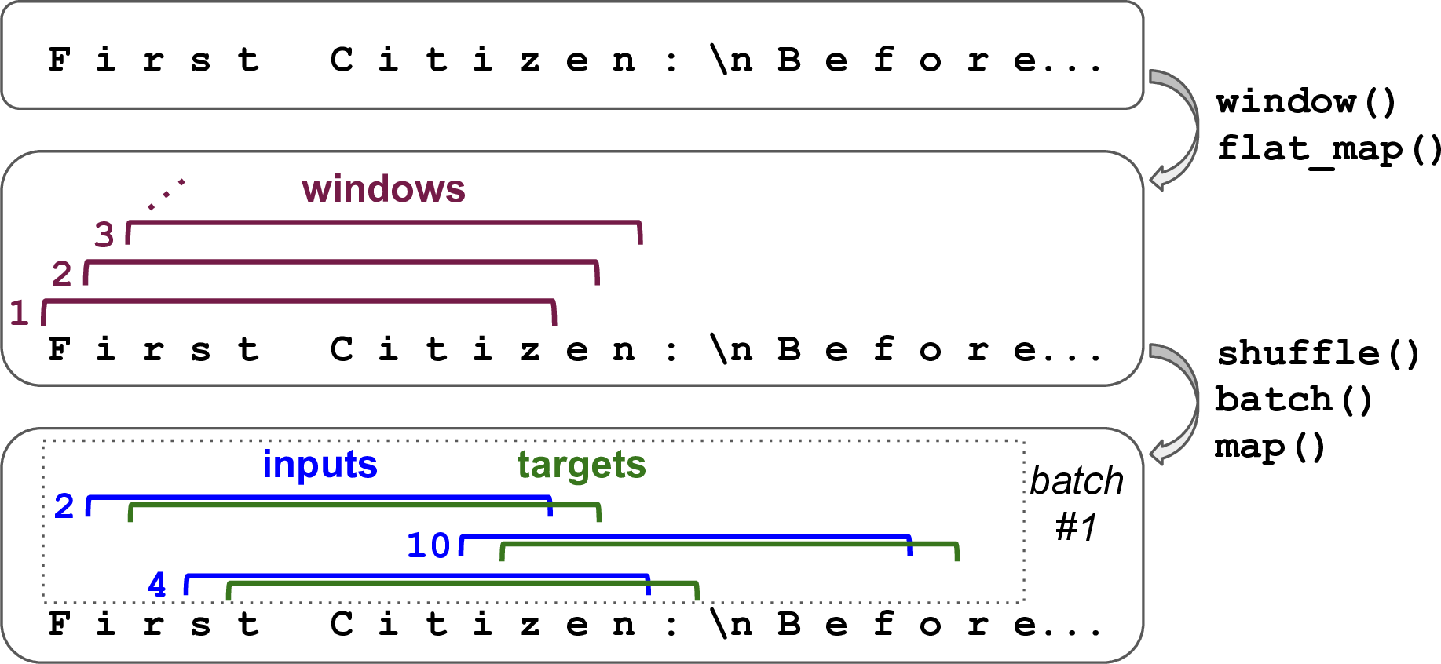

In [ ]:
dataset_size = word_tokenizer.document_count
train_size = dataset_size * 90 // 100
dataset = tf.data.Dataset.from_tensor_slices(encoded[:train_size])

n_steps = 100
window_length = n_steps + 1 # target = input shifted 1 character ahead
dataset = dataset.window(window_length, shift=1, drop_remainder=True)
dataset
dataset = dataset.flat_map(lambda window: window.batch(window_length))
batch_size=40
# before
for i in dataset.take(1):
    first = i

# after suffling and taking batch tensor of size 100 or 
dataset = dataset.shuffle(10000).batch(batch_size)
dataset = dataset.map(lambda window: (window[:,:-1],window[:,1:]))
dataset = dataset.map(lambda X_batch,y_batch: (tf.one_hot(X_batch,depth=max_id),y_batch))
dataset = dataset.prefetch(1)

In [ ]:
# it is taking very very long and need something perhaps I don't know and we will take it after some time but it important
model = keras.Sequential([
                          keras.layers.GRU(39,return_sequences=True,dropout=0.2,recurrent_dropout=0.2,input_shape=[None,max_id]),
                          keras.layers.GRU(39,return_sequences=True,dropout=0.2,recurrent_dropout=0.2),
                          keras.layers.TimeDistributed(keras.layers.Dense(max_id,activation="softmax"))

])

model.compile(optimizer="adam",loss='sparse_categorical_crossentropy')

model.fit(dataset,epochs=5)

In [ ]:
# print(word_tokenizer.sequences_to_texts([first_map[0].numpy()])[0])

train_size = dataset_size * 40 // 100

dataset = tf.data.Dataset.from_tensor_slices(encoded[:train_size])
dataset = dataset.window(window_length, shift=n_steps, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(window_length))
dataset = dataset.batch(1)
dataset = dataset.map(lambda windows: (windows[:, :-1], windows[:, 1:]))
dataset = dataset.map(
    lambda X_batch, Y_batch: (tf.one_hot(X_batch, depth=max_id), Y_batch))
dataset = dataset.prefetch(1)

model = keras.models.Sequential([
    keras.layers.GRU(128, return_sequences=True, stateful=True,
                     dropout=0.2, recurrent_dropout=0.2,
                     batch_input_shape=[1, None, max_id]),
    keras.layers.GRU(128, return_sequences=True, stateful=True,
                     dropout=0.2, recurrent_dropout=0.2),
    keras.layers.TimeDistributed(keras.layers.Dense(max_id,
                                                    activation="softmax"))
])


class ResetStatesCallback(keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs):
        self.model.reset_states()

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam")
model.fit(dataset, epochs=5, callbacks=[ResetStatesCallback()])

In [ ]:
print(word_tokenizer.sequences_to_texts([first.numpy()])[0])


In [ ]:
# loading imdb movie rating data which has 25,000 training and 25000 test all are reviews stored as list indec by their frequency

import tensorflow_datasets as tfds

datasets, info = tfds.load("imdb_reviews", as_supervised=True, with_info=True)
train_size = info.splits["train"].num_examples


In [ ]:
datasets

In [ ]:
def preprocess(X_batch, y_batch):
    X_batch = tf.strings.substr(X_batch, 0, 300)
    X_batch = tf.strings.regex_replace(X_batch, b"<br\\s*/?>", b" ")
    X_batch = tf.strings.regex_replace(X_batch, b"[^a-zA-Z']", b" ")
    X_batch = tf.strings.split(X_batch)
    return X_batch.to_tensor(default_value=b"<pad>"), y_batch


from collections import Counter
vocab = Counter()
for X_batch,y_batch in datasets['train'].batch(32).map(preprocess):
    for review in X_batch:
        vocab.update(list(review.numpy()))
vocab

In [ ]:
vocab.most_common()[:3]
vocab_size = 10000
truncate_vocab = [word for word,count in vocab.most_common()[:vocab_size]]

len(truncate_vocab)

words = tf.constant(truncate_vocab)
word_ids = tf.range(len(words),dtype=tf.int64)

vocab_init = tf.lookup.KeyValueTensorInitializer(words, word_ids)
num_oov_buckets = 1000
table = tf.lookup.StaticVocabularyTable(vocab_init, num_oov_buckets)

In [ ]:
table.lookup(tf.constant([b"I hate this movie".split()]))

In [ ]:
def encode_word(X_batch,y_batch):
    return table.lookup(X_batch),y_batch

train_set = datasets['train'].batch(32).map(preprocess)
train_set = train_set.map(encode_word).prefetch(1)

In [ ]:
embed_size = 128
model = keras.models.Sequential([
    keras.layers.Embedding(vocab_size + num_oov_buckets, embed_size,
                           input_shape=[None]),
    keras.layers.GRU(128, return_sequences=True),
    keras.layers.GRU(128),
    keras.layers.Dense(1, activation="sigmoid")
])
model.compile(loss="binary_crossentropy", optimizer="adam",
              metrics=["accuracy"])
history = model.fit(train_set, epochs=5)

In [ ]:
model.save("/content/mydrive/MyDrive/imdb_model/")

In [ ]:

model = keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/nnlm-en-dim50/1",
                   dtype=tf.string, input_shape=[], output_shape=[50]),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])
model.compile(loss="binary_crossentropy", optimizer="adam",
              metrics=["accuracy"])

datasets, info = tfds.load("imdb_reviews", as_supervised=True, with_info=True)
train_size = info.splits["train"].num_examples
batch_size = 32
train_set = datasets["train"].batch(batch_size).prefetch(1)
history = model.fit(train_set, epochs=5)
train_set

In [ ]:
test_dataset = datasets["test"].batch(batch_size).prefetch(1)

model.evaluate(test_dataset)


In [ ]:
for i in test_dataset.take(1):
    print(len(i),i[0].numpy()[0])
    ts = i[0].numpy()


In [ ]:
ts = tf.constant(ts)
pred = np.argmax(model.predict(ts), axis=-1)
print("review:\t{}\nprediction\t{} \n\t".format(tf.compat.as_str(ts[1].numpy())[:60], pred[0]))

In [ ]:
tf.compat.as_str(ts[0].numpy())

In [ ]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  if 'val_'+metric in history.history:
    plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

plot_graphs(history,'accuracy')

# history.history

In [ ]:
for i in train_dataset.take(1):
    print(len(i),i['label'],(i['text'])[0])

In [ ]:
for example, label in train_dataset.take(1):
  print('texts: ', example.numpy()[:3])
  print()
  print('labels: ', label.numpy()[:3])


In [ ]:
VOCAB_SIZE = 1000
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))

example

In [ ]:
model = keras.Sequential([encoder,
                          keras.layers.Embedding(input_dim=len(encoder.get_vocabulary()),output_dim=64,mask_zero=True),
                          keras.layers.Bidirectional(keras.layers.LSTM(64)),
                          keras.layers.Dense(64,"relu"),
                          keras.layers.Dense(1)

])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

model.fit(train_dataset,epochs=5,validation_data=test_dataset,validation_steps=30)

In [ ]:
sample_text = ('i just like this movie')
# predictions = model.predict(np.array([sample_text]))
predictions = np.argmax(model.predict(test_dataset),axis=-1)
print(predictions)

In [ ]:
datasets,info = tfds.load("fashion_mnist",with_info=True,as_supervised=True)
example = info.splits['train'].num_examples
train_dataset = datasets['train'].shuffle(example).batch(32).prefetch(1)
valid_dataset = datasets['test'].shuffle(example).batch(32).prefetch(1)

In [ ]:
X_train.shape,X_valid.shape,y_train.shape,y_valid.shape

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0



stacked_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu"),
])
stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])
stacked_ae.compile(loss=keras.losses.binary_crossentropy,
                   optimizer=keras.optimizers.SGD(learning_rate=1.5))
history = stacked_ae.fit(X_train, X_train, epochs=10
                         )

stacked_ae.summary()

In [ ]:
stacked_ae.summary()

In [ ]:
history.history

In [ ]:
fig,ax = plt.subplots(2,6,figsize=(12,5))
i,ct=0,0
# while i<2:
for j in range(1,7):
    r = stacked_ae.predict(X_train[(j-1):j]).reshape(28,28)
    ax[0][j-1].imshow(r,cmap="gray")
    ax[0][j-1].set_title(y_train[j-1])
    ax[0][j-1].axis("off")

for j in range(6):
    # r = stacked_ae.predict().reshape(28,28)
    o = X_train[j].reshape(28,28)

    ax[1][j].imshow(o,cmap="gray")
    ax[1][j].set_title(y_train[j])
    ax[1][j].axis("off")




In [ ]:
cfir = keras.datasets.cifar10
(X_train_full, y_train_full), (X_test, y_test) = cfir.load_data()

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

stacked_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32,3]),
    keras.layers.Dense(200, activation="selu"),
    keras.layers.Dense(200, activation="selu"),
    keras.layers.Dense(100, activation="selu"),
])

stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[100]),
    keras.layers.Dense(200, activation="selu"),
    keras.layers.Dense(32 *32*3 , activation="sigmoid"),
    keras.layers.Reshape([32, 32,3])
])

stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])
stacked_ae.compile(loss=keras.losses.binary_crossentropy,
                   optimizer=keras.optimizers.Nadam())
history = stacked_ae.fit(X_train, X_train, epochs=20  )

stacked_ae.summary()

In [ ]:
def plot_image_owner(model)
    fig,ax = plt.subplots(2,6,figsize=(12,5))
    i,ct=0,0
    # while i<2:
    for j in range(1,7):
        r = model.predict(X_train[(j-1):j]).reshape(32,32,3)
        ax[0][j-1].imshow(r,cmap="gray")
        ax[0][j-1].set_title(y_train[j-1])
        ax[0][j-1].axis("off")

    for j in range(6):
        # r = stacked_ae.predict().reshape(28,28)
        o = X_train[j].reshape(32,32,3)

        ax[1][j].imshow(o,cmap="gray")
        ax[1][j].set_title(y_train[j])
        ax[1][j].axis("off")




In [ ]:
# more clean code for image plot and compare
def plot_image(idx):
    plt.imshow(idx,cmap="gray")
    plt.axis("off")

def show_reconstructions(model, n_images=5):
    reconstructions = model.predict(X_valid[:n_images])
    fig = plt.figure(figsize=(n_images *2, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(X_valid[image_index])
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(reconstructions[image_index])
show_reconstructions(stacked_ae, n_images=5)

In [ ]:
from sklearn.manifold import TSNE

stacked_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32,3]),
    keras.layers.Dense(200, activation="selu"),
    keras.layers.Dense(50, activation="selu"),
])


X_valid_compressed = stacked_encoder.predict(X_valid)

tsne_comp = TSNE()

X_valid_2D = tsne_comp.fit_transform(X_valid_compressed)


In [ ]:
fig,ax = plt.subplots(1,figsize=(15,10))
plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], c=y_valid, s=10, cmap="tab10")

In [ ]:
tf.multiply(4,5)

In [ ]:

class DenseTranspose(keras.layers.Layer):
    def __init__(self, dense, activation=None, **kwargs):
        self.dense = dense
        self.activation = keras.activations.get(activation)
        super().__init__(**kwargs)
    def build(self, batch_input_shape):
        self.biases = self.add_weight(name="bias", initializer="zeros",
                                      shape=[self.dense.input_shape[-1]])
        super().build(batch_input_shape)
    def call(self, inputs):
        z = tf.matmul(inputs, self.dense.weights[0], transpose_b=True)
        return self.activation(z + self.biases)

# it is using same structure as above but this time we are using weights of autoencoder for decoder, so number of
# paramerter learning is half, increases performance and loss is also comparable
dense_1 = keras.layers.Dense(300, activation="selu")
dense_2 = keras.layers.Dense(100, activation="selu")

tied_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32,32,3]),
    dense_1,
    dense_2
])


tied_decoder = keras.models.Sequential([
    DenseTranspose(dense_2, activation="selu"),
    DenseTranspose(dense_1, activation="sigmoid"),
    keras.layers.Reshape([32,32,3])
])

tied_ae = keras.models.Sequential([tied_encoder, tied_decoder])
tied_ae.compile(loss=keras.losses.binary_crossentropy,
                   optimizer=keras.optimizers.Nadam())
history= tied_ae.fit(X_train,X_train,epochs=10,validation_data=[X_valid,X_valid])

In [ ]:
stacked_encoder.weights[0]

In [ ]:
conv_encoder = keras.models.Sequential([
    keras.layers.Reshape([28, 28, 1], input_shape=[28, 28]),
    keras.layers.Conv2D(16, kernel_size=3, padding="same", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(32, kernel_size=3, padding="same", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(64, kernel_size=3, padding="same", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2)
])
conv_decoder = keras.models.Sequential([
    keras.layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding="valid",
                                 activation="selu",
                                 input_shape=[3, 3, 64]),
    keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, padding="same",
                                 activation="selu"),
    keras.layers.Conv2DTranspose(1, kernel_size=3, strides=2, padding="same",
                                 activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
conv_ae = keras.models.Sequential([conv_encoder, conv_decoder])

conv_ae.compile(optimizer=keras.optimizers.Nadam(),loss=keras.losses.binary_crossentropy,metrics=['accuracy'])

# mnist = keras.datasets
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0


conv_ae.fit(X_train,X_train,epochs=10,validation_data=(X_valid,X_valid))

In [ ]:
show_reconstructions(conv_ae,n_images=20)

In [ ]:
recurrent_encoder = keras.models.Sequential([
    keras.layers.LSTM(100, return_sequences=True, input_shape=[None, 28]),
    keras.layers.LSTM(30)
])
recurrent_decoder = keras.models.Sequential([
    keras.layers.RepeatVector(28, input_shape=[30]),
    keras.layers.LSTM(100, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(28, activation="sigmoid"))
])
recurrent_ae = keras.models.Sequential([recurrent_encoder, recurrent_decoder])

recurrent_ae.compile(optimizer=keras.optimizers.Nadam(),loss=keras.losses.binary_crossentropy,metrics=['accuracy'])


In [ ]:
dropout_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu")
])
dropout_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
dropout_ae = keras.models.Sequential([dropout_encoder, dropout_decoder])
dropout.compile(optimizer=keras.optimizers.Nadam(),loss=keras.losses.binary_crossentropy,metrics=['accuracy'])


In [ ]:
K = keras.backend
class Sampling(keras.layers.Layer):
    def call(self, inputs):
        mean, log_var = inputs
        return K.random_normal(tf.shape(log_var)) * K.exp(log_var / 2) + mean


codings_size = 10

inputs = keras.layers.Input(shape=[28, 28])
z = keras.layers.Flatten()(inputs)
z = keras.layers.Dense(150, activation="selu")(z)
z = keras.layers.Dense(100, activation="selu")(z)
codings_mean = keras.layers.Dense(codings_size)(z)  # μ
codings_log_var = keras.layers.Dense(codings_size)(z)  # γ
codings = Sampling()([codings_mean, codings_log_var])
variational_encoder = keras.Model(
    inputs=[inputs], outputs=[codings_mean, codings_log_var, codings])


decoder_inputs = keras.layers.Input(shape=[codings_size])
x = keras.layers.Dense(100, activation="selu")(decoder_inputs)
x = keras.layers.Dense(150, activation="selu")(x)
x = keras.layers.Dense(28 * 28, activation="sigmoid")(x)
outputs = keras.layers.Reshape([28, 28])(x)
variational_decoder = keras.Model(inputs=[decoder_inputs], outputs=[outputs])


In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [ ]:
# Fashion mnist data 
codings_size = 30


# this is fake image genrator and used to generate images or learn parameter to build same image as input --Generative adversial network
generator = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[codings_size]),
    keras.layers.Dense(150, activation="selu"),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

# this is discriminator usual work of determining whether it is fake or real -- GAN 
discriminator = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(150, activation="selu"),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(1, activation="sigmoid")
])
gan = keras.models.Sequential([generator, discriminator])




In [ ]:
discriminator.compile(loss="binary_crossentropy", optimizer="rmsprop")
discriminator.trainable = False
gan.compile(loss="binary_crossentropy", optimizer="rmsprop")


batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices(X_train).shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)


def train_gan(gan, dataset, batch_size, codings_size, n_epochs=50):
    generator, discriminator = gan.layers
    for epoch in range(n_epochs):
        for X_batch in dataset:
            # phase 1 - training the discriminator
            noise = tf.random.normal(shape=[batch_size, codings_size])
            generated_images = generator(noise)
            # generated_images = tf.cast(generated_images,tf.float32)
            X_fake_and_real = tf.concat([generated_images, X_batch], axis=0)
            y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
            discriminator.trainable = True
            discriminator.train_on_batch(X_fake_and_real, y1)
            # phase 2 - training the generator
            noise = tf.random.normal(shape=[batch_size, codings_size])
            plt.imshow(noise,cmap="gray")
            y2 = tf.constant([[1.]] * batch_size)
            discriminator.trainable = False
            gan.train_on_batch(noise, y2)

train_gan(gan, dataset, batch_size, codings_size)



In [ ]:
codings_size = 100

generator = keras.models.Sequential([
    keras.layers.Dense(7 * 7 * 128, input_shape=[codings_size]),
    keras.layers.Reshape([7, 7, 128]),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(64, kernel_size=5, strides=2, padding="same",
                                 activation="selu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(1, kernel_size=5, strides=2, padding="same",
                                 activation="tanh")
])
discriminator = keras.models.Sequential([
    keras.layers.Conv2D(64, kernel_size=5, strides=2, padding="same",
                        activation=keras.layers.LeakyReLU(0.2),
                        input_shape=[28, 28, 1]),
    keras.layers.Dropout(0.4),
    keras.layers.Conv2D(128, kernel_size=5, strides=2, padding="same",
                        activation=keras.layers.LeakyReLU(0.2)),
    keras.layers.Dropout(0.4),
    keras.layers.Flatten(),
    keras.layers.Dense(1, activation="sigmoid")
])
gan = keras.models.Sequential([generator, discriminator])

In [ ]:
X_train = X_train.reshape(-1, 28, 28, 1) * 2. - 1. # reshape and rescale


In [ ]:
def preprocess_fn(data):
  image = data['image']

  # Normalize [0, 255] to [0, 1]
  image = tf.cast(image, tf.float32)
  image = image / 255.

  # Resize the images to 224 x 224
  image = tf.image.resize(image, (224, 224))

  data['image'] = image
  return data

In [ ]:
def preprocess_fn(data):
    image = keras.preprocessing.image.load_img(data)
    image = keras.preprocessing.image.img_to_array(image)
    # Normalize [0, 255] to [0, 1]
    image = tf.cast(image, tf.float32)
    image = image / 255.

    # Resize the images to 224 x 224
    image = tf.image.resize(image, (224, 224))

  
    return image
img = preprocess_fn("/content/train-cbb-4.jpg")
tf.constant(img).batch(1)

In [ ]:
keras.preprocessing.image.load_img()

# exercises

Loading all datasets

In [ ]:
datasets = tfds.load('cassava',as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/cassava/0.1.0.incomplete2T4SBC/cassava-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/cassava/0.1.0.incomplete2T4SBC/cassava-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/cassava/0.1.0.incomplete2T4SBC/cassava-validation.tfrecord


Dataset cassava downloaded and prepared to /root/tensorflow_datasets/cassava/0.1.0. Subsequent calls will reuse this data.


In [ ]:
words = ["mongo","mongoose","tea","mhjds","nmsda"]
[[x for x in i] for i in words]

[['m', 'o', 'n', 'g', 'o'],
 ['m', 'o', 'n', 'g', 'o', 'o', 's', 'e'],
 ['t', 'e', 'a'],
 ['m', 'h', 'j', 'd', 's'],
 ['n', 'm', 's', 'd', 'a']]

state, action, rewards 

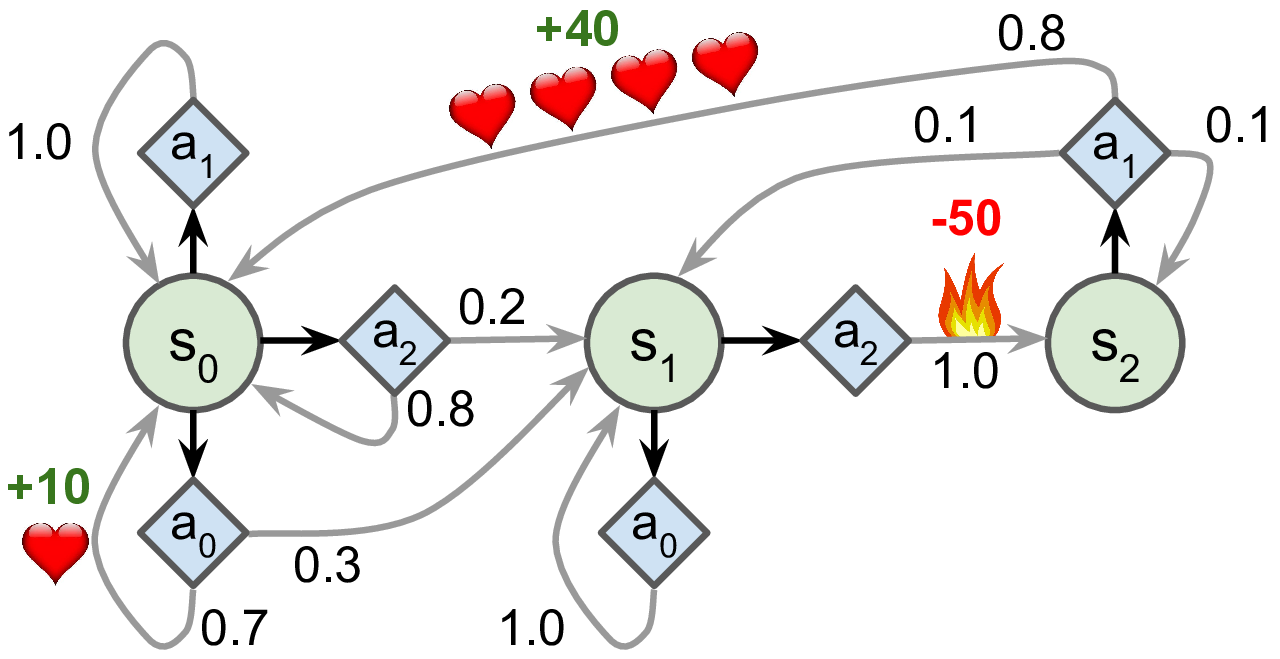

In [ ]:
def preprocess(data,label):
    image = data
    image = tf.cast(image,tf.float32)
    image = image/255.0
    image = tf.image.resize(image,[224,224])
    # data['image'] = image
    return image,label

train_datasets= datasets['train'].map(preprocess).shuffle(10000).batch(64).prefetch(1)
valid_datasets= datasets['validation'].map(preprocess).batch(64).prefetch(1)
test_datasets = datasets['test'].map(preprocess).batch(64).prefetch(1)


In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, 7, activation="relu", padding="same",
                        input_shape=[224,224,3]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(64, 4, activation="relu", padding="same"),
    keras.layers.Conv2D(64, 4, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    # keras.layers.Conv2D(128, 6, activation="relu", padding="same"),
    # keras.layers.Conv2D(256, 6, activation="relu", padding="same"),
    # keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(5, activation="softmax")
])

starter_learning_rate = 0.01
end_learning_rate = 0.0001
decay_steps = 10000
learning_rate_fn = tf.keras.optimizers.schedules.PolynomialDecay(
    starter_learning_rate,
    decay_steps,
    end_learning_rate,
    power=0.5)


checkpoint_path = "/content/drive/MyDrive/cassava_model"
early_stop = keras.callbacks.EarlyStopping(patience=6,restore_best_weights=True)


save_model = keras.callbacks.ModelCheckpoint(checkpoint_path,save_best_only=True)

model.compile(optimizer=tf.keras.optimizers.Nadam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_datasets,epochs=30,validation_data = valid_datasets,callbacks=[early_stop,save_model])


In [ ]:
model.load_weights(checkpoint_path)
model.evaluate(valid_datasets)

30/30 [==============================] - 6s 204ms/step - loss: 2.5267 - accuracy: 0.2139


[2.5266802310943604, 0.21386976540088654]

In [ ]:
from sklearn.datasets import load_sample_images

flower = load_sample_images()
flower = (flower['images'])
flower = tf.image.resize(flower,[224,224])

flw = tf.data.Dataset.from_tensor_slices(flower)
flw= flw.batch(2)

flower_iter  =flw.as_numpy_iterator()
first = next(flower_iter)

In [ ]:

input_shape = (4, 28, 28, 3)
x = tf.random.normal(input_shape)
plt.imshow(x[0])

y = tf.keras.layers.Conv2D(
filters= 3,kernel_size=6, activation=None,  input_shape=[28,28,3])(x)
plt.imshow(y[0])

input_shape = [2,224,224,3]

# x = tf.random.normal(input_shape)
fig,ax = plt.subplots(1,2,figsize=(15,15))

y = tf.keras.layers.Conv2D(
3,(3,3),strides= (2,2), activation='elu', padding="same", input_shape=[224,224,3])(first)
print(y.shape)

ax[1].imshow(y[0])
ax[0].imshow(y[1])


In [ ]:
example  = train_datasets.as_numpy_iterator()
example = next(example)

# Fine tuning pre-trained model (Mobilenet_v3) 

In [ ]:
path = "/content/train-cbb-1.jpg"

image = keras.preprocessing.image.load_img(path)
image = keras.preprocessing.image.img_to_array(image)

image,label = preprocess(image,np.array([1]))

datasets,info = tfds.load("cats_vs_dogs",with_info=True,as_supervised=True)

In [ ]:
simple_model = keras.layers.Dense(4)
simple_model.build((None,4))
simple_model.trainable =False

print("weight",len( simple_model.weights))
print("trainable_weights",len(simple_model.trainable_weights))
print("non-trainable_weights",len(simple_model.non_trainable_weights))

layer_norm = keras.layers.BatchNormalization()
layer_norm.build((None,4))
print()
print("weight",len( layer_norm.weights))
print("trainable_weights",len(layer_norm.trainable_weights))
print("non-trainable_weights",len(layer_norm.non_trainable_weights))


weight 2
trainable_weights 0
non-trainable_weights 2

weight 4
trainable_weights 2
non-trainable_weights 2


In [ ]:
layer1 = keras.layers.Dense(3,"relu")
layer2 = keras.layers.Dense(3,"sigmoid")
model = keras.Sequential([keras.layers.InputLayer((3,)),layer1,layer2])

tf.pr
layer1.trainable = False  # freezing layer1 --not changing intial assign weights
initial_layer1_weights_values = layer1.get_weights()

model.compile(optimizer = "adam",loss="mse")

model.fit(np.random.random((2,3)),np.random.random((2,3)))

# Check that the weights of layer1 have not changed during training
final_layer1_weights_values = layer1.get_weights()
np.testing.assert_allclose(
    initial_layer1_weights_values[0], final_layer1_weights_values[0]
)
np.testing.assert_allclose(
    initial_layer1_weights_values[1], final_layer1_weights_values[1]
)
initial_layer1_weights_values,final_layer1_weights_values

In [ ]:
inner_model = keras.Sequential(
    [
        keras.Input(shape=(3,)),
        keras.layers.Dense(3, activation="relu"),
        keras.layers.Dense(3, activation="relu"),
    ]
)

model = keras.Sequential(
    [keras.Input(shape=(3,)), inner_model, keras.layers.Dense(3, activation="sigmoid"),]
)

inner_model.trainable = False  # Freeze the outer model

model.compile(optimizer = "adam",loss="mse")

model.fit(np.random.random((2,3)),np.random.random((2,3)))

# assert inner_model.trainable == False  # All layers in `model` are now frozen
# assert inner_model.layers[0].trainable == False  # `trainable` is propagated recursively

inner_model.trainable,model.trainable,inner_model.layers[0].trainable

1/1 [==============================] - 0s 246ms/step - loss: 0.1349


(True, True, False)

In [ ]:
# pretrained model --Mobilenet_v2 or v3 or v1


base_model_mobilenet = tf.keras.applications.MobileNet(
    input_shape=[224,224,3],
    include_top=False,
    weights="imagenet",
    
)

base_model_xception = keras.applications.Xception(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(224, 224, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

# mobilenet_model.summary()

In [ ]:
base_model_mobilenet.trainable = False


In [ ]:
# Freezing weight for both model -do not change pre trained weight of base model

inputs = keras.Input(shape=(224, 224, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = base_model_mobilenet(inputs, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(5)(x)
model = keras.Model(inputs, outputs)


model.compile(optimizer=keras.optimizers.Nadam(),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

checkpoint_path = "/content/drive/MyDrive/cassava_model"
early_stop = keras.callbacks.EarlyStopping(patience=6)

save_model = keras.callbacks.ModelCheckpoint(checkpoint_path,save_best_only=True)

model.fit(train_datasets, epochs=20, callbacks= [early_stop,save_model], validation_data=valid_datasets)
model.output

In [ ]:
dataset_cov = pd.read_csv("/content/drive/MyDrive/datasets/covid-19/who_covid_19_sit_rep_time_series/who_covid_19_sit_rep_time_series.csv")
dataset_cov_diff = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/owid-covid-data.csv")

In [ ]:
dataset_cov_diff.info()

# Training Efficient model
it has 8 different models from B0 version to B7
with imagenet weights and flowers and cfir10,cfir100,cassavara disease datasets
EfficientNetB0 input shape =[224,224,3]

it uses less number of parameters 
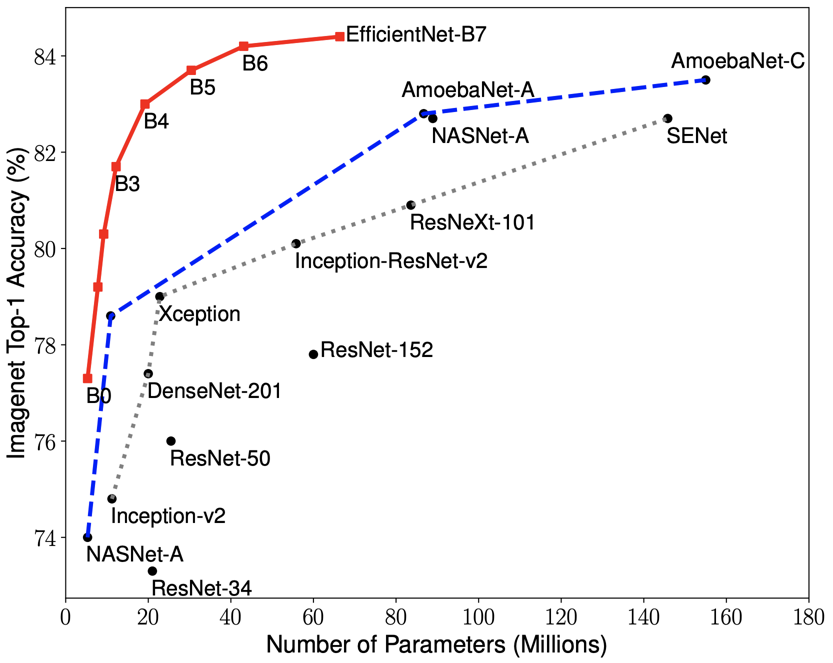)]

In [ ]:
# Loading all datasets used for training the efficientNetB0 model

# standford dogs dataset

(ds_train, ds_test), ds_info = tfds.load(
    "stanford_dogs", split=["train", "test"], with_info=True, as_supervised=True
)

(ds_train1, ds_test1), ds_info1 = tfds.load(
    "cifar10", split=["train", "test"], with_info=True, as_supervised=True
)
(ds_train2, ds_test2), ds_info2 = tfds.load(
    "cifar100", split=["train", "test"], with_info=True, as_supervised=True
)
(ds_train3, ds_test3), ds_info3 = tfds.load(
    "cassava", split=["train", "test"], with_info=True, as_supervised=True
)

Shuffling and writing examples to /root/tensorflow_datasets/stanford_dogs/0.2.0.incomplete7DNLTG/stanford_dogs-train.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/stanford_dogs/0.2.0.incomplete7DNLTG/stanford_dogs-test.tfrecord
Dataset stanford_dogs downloaded and prepared to /root/tensorflow_datasets/stanford_dogs/0.2.0. Subsequent calls will reuse this data.
Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.2.incompleteYDJPOQ/cifar10-train.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.2.incompleteYDJPOQ/cifar10-test.tfrecord
Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.
Shuffling and writing examples to /root/tensorflow_datasets/cifar100/3.0.2.incomplete582IRA/cifar100-train.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/cifar100/3.0.2.incomplete582IRA/cifar100-test.tfrecord
Dataset cifar100 downloaded and p

In [ ]:

IMG_SIZE = 224
BATCH_SIZE = 64
DATASET = "stanford_dogs"
SHUFFLE_SIZE = ds_info.splits['train'].num_examples
NUM_CLASSES = ds_info.features["label"].num_classes


In [ ]:
def preprocess(data,lable):
    # image = data['image']
    # image  = tf.cast(image,tf.float32)
    image = tf.image.resize(data,[224,224])
    image = image/255
    # data['image'] = image
    return data,lable

size = (IMG_SIZE, IMG_SIZE)
ds_train = ds_train.map(lambda image, label: (tf.image.resize(image, size), label))
ds_test = ds_test.map(lambda image, label: (tf.image.resize(image, size), label))


In [ ]:
import tensorflow as tf

try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
    print("Running on TPU ", tpu.cluster_spec().as_dict()["worker"])
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
except ValueError:
    print("Not connected to a TPU runtime. Using CPU/GPU strategy")
    strategy = tf.distribute.MirroredStrategy()

Not connected to a TPU runtime. Using CPU/GPU strategy


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)


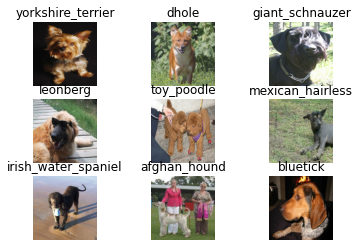

In [ ]:
def show_image():
    def format_label(label):
        string_label = label_info.int2str(label)
        return string_label.split("-")[1]


    label_info = ds_info.features["label"]
    for i, (image, label) in enumerate(ds_train.take(9)):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image.numpy().astype("uint8"))
        plt.title("{}".format(format_label(label)))
        plt.axis("off")
show_image()

In [ ]:
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

img_augmentation = Sequential(
    [
        preprocessing.RandomRotation(factor=0.15),
        preprocessing.RandomTranslation(height_factor=0.1, width_factor=0.1),
        preprocessing.RandomFlip(),
        preprocessing.RandomContrast(factor=0.1),
    ],
    name="img_augmentation",
)


In [ ]:
label_info = ds_info.features['label']

for image, label in ds_train.take(2):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        aug_img = img_augmentation(tf.expand_dims(image, axis=0))
        plt.imshow(aug_img[0].numpy().astype("uint8"))
        plt.title("{}".format(format_label(label)))
        plt.axis("off")

In [ ]:
ds_train = ds_train.batch(BATCH_SIZE).shuffle(SHUFFLE_SIZE).prefetch(1)
ds_valid = ds_test.batch(BATCH_SIZE).shuffle(SHUFFLE_SIZE).prefetch(1)
ds_valid,ds_train

In [ ]:
# # model training eficientnetb0 from scratch

# from keras.applications.efficientnet import EfficientNetB0

# with strategy.scope():
#     inputs = keras.Input(shape=(IMG_SIZE,IMG_SIZE,3))
#     X = img_augmentation(inputs)
#     outputs = EfficientNetB0(include_top=True,weights=None,classes=NUM_CLASSES)(X)
#     model = keras.Model(inputs,outputs)

#     model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

# model.summary()
# history = model.fit(ds_train,epochs=50,validation_data=ds_test)


from tensorflow.keras.applications import EfficientNetB0

with strategy.scope():
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    x = img_augmentation(inputs)
    outputs = EfficientNetB0(include_top=True, weights=None, classes=NUM_CLASSES)(x)

    model = tf.keras.Model(inputs, outputs)
    model.compile(
        optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
    )

model.summary()

epochs = 10  


In [ ]:
from keras.layers.experimental import preprocessing

def build(num_classes):
    inputs = keras.Input(shape=(IMG_SIZE,IMG_SIZE,3))
    x = img_augmentation(inputs)
    model = EffiecientNetB0(include_top=False,input_tensor=x,weights='imagenet')

    # freeze pretrained model layer or using image net weights
    model.trainable = False

    x = keras.layers.GlobalAveragePooling2D(name='ang_pool')(model.output)
    x = keras.layers.BatchNormalization()(x)

    



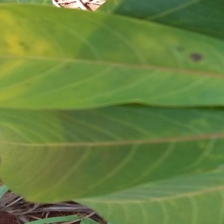

In [ ]:
from PIL import Image
# classifier_model ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"
classifier_model = "https://tfhub.dev/google/cropnet/classifier/cassava_disease_V1/2"
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer(classifier_model, input_shape=IMAGE_SHAPE+(3,))
])

grace_path = "/content/train-cbb-1.jpg"
grace_hopper = Image.open(grace_path).resize(IMAGE_SHAPE)
grace_hopper

In [ ]:
grace_hopper = np.array(grace_hopper)/255.0
grace_hopper.shape
result = classifier.predict(grace_hopper[np.newaxis, ...])
result.shape

(1, 6)

In [ ]:
predicted_class = np.argmax(result[0], axis=-1)

predicted_class = labels[predicted_class]
name_map[predicted_class]

'Bacterial Blight'

In [ ]:

name_map = dict(
    cmd='Mosaic Disease',
    cbb='Bacterial Blight',
    cgm='Green Mite',
    cbsd='Brown Streak Disease',
    healthy='Healthy',
    unknown='Unknown')

labels = list(name_map.keys())
labels

['cmd', 'cbb', 'cgm', 'cbsd', 'healthy', 'unknown']

In [ ]:
keras.models.save_model(classifier,"/content/model",)

INFO:tensorflow:Assets written to: /content/model/assets


INFO:tensorflow:Assets written to: /content/model/assets


In [ ]:
model = keras.models.load_model("/content/model")


In [ ]:
result = model.predict(grace_hopper[np.newaxis, ...])

predicted_class = np.argmax(result[0], axis=-1)

predicted_class = labels[predicted_class]
name_map[predicted_class]

'Bacterial Blight'

# Question -duplicate data using sklearn and RNN

In [29]:
path = "/content/drive/MyDrive/datasets/zip data files/quora_duplicate_questions.tsv"
datasets = pd.read_csv(path,sep="\t", header=0)

# datasets[['question1','question2']]=  datasets.select_dtypes(include='O').convert_dtypes(pd.StringDtype())

datasets.dropna(inplace=True)
train_dataset,valid_dataset  = datasets.iloc[:int(datasets.shape[0]*0.8),:],datasets.iloc[int(datasets.shape[0]*0.8):,:]
datasets.to_csv("/content/csv_quora_data.csv")

train_dataset.to_csv("/content/csv_quora_data_train.csv")
valid_dataset.to_csv("/content/csv_quora_data_valid.csv")
datasets.head(1)
datasets.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 404348 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404348 non-null  int64 
 1   qid1          404348 non-null  int64 
 2   qid2          404348 non-null  int64 
 3   question1     404348 non-null  object
 4   question2     404348 non-null  object
 5   is_duplicate  404348 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 21.6+ MB


In [30]:
train_dataset.shape,valid_dataset.shape

((323478, 6), (80870, 6))

In [8]:
tf_datasets = tf.data.experimental.CsvDataset("/content/csv_quora_data.csv", [tf.int32, tf.int32, tf.string,tf.string,tf.int32],header=True, select_cols=[2,3,4,5,6])
tf_datasets


<CsvDatasetV2 shapes: ((), (), (), (), ()), types: (tf.int32, tf.int32, tf.string, tf.string, tf.int32)>

In [31]:
train_tf_datasets = tf.data.experimental.CsvDataset("/content/csv_quora_data_train.csv", [tf.string,tf.string,tf.int32],header=True, select_cols=[4,5,6])
valid_tf_datasets = tf.data.experimental.CsvDataset("/content/csv_quora_data_valid.csv", [tf.string,tf.string,tf.int32],header=True, select_cols=[4,5,6])
train_tf_datasets;  valid_tf_datasets

<CsvDatasetV2 shapes: ((), (), ()), types: (tf.string, tf.string, tf.int32)>

In [33]:
import regex as re
pat = re.compile("[.!@#$%^&*()><:;""''?/\*0-9]")

def tf_preprocess(input_data):
    input_data =input_data.map(lambda c,d,x: (tf.strings.lower(c),tf.strings.lower(d),x))
    data = input_data.map(lambda a,c,d: (tf.strings.regex_replace(a,"[.!@#$%^&*()><:;""''?/\*0-9]",""),tf.strings.regex_replace(c,"[.!@#$%^&*()><:;""''?/\*0-9]",""),d))
    data = data.cache().shuffle(10**5).batch(64).prefetch(1)
    return data

# datasets.dropna(inplace=True)
# datasets['question1'] = datasets['question1'].apply(preprocess)
# datasets['question2'] = datasets['question2'].apply(preprocess)


tf_datasets= tf_datasets.apply(tf_preprocess)

train_tf_datasets= train_tf_datasets.apply(tf_preprocess);  valid_tf_datasets = valid_tf_datasets.apply(tf_preprocess)


In [10]:

def spliting_data():
    datasets_valid = datasets.iloc[:int(0.2*datasets.shape[0]),:]
    datasets_train = datasets.iloc[int(0.2*datasets.shape[0]):,:]
    return datasets_train,datasets_valid
datasets_train,datasets_valid = spliting_data()



In [ ]:
# files saving for keras data preprocessing
path0 ="/content/drive/MyDrive/train_quora/0/train0.csv"
path1 ="/content/drive/MyDrive/train_quora/1/train1.csv"

datasets_train[datasets_train['is_duplicate']==0].to_csv(path0)
datasets_train[datasets_train['is_duplicate']==1].to_csv(path1)

path0 ="/content/drive/MyDrive/validation_qoura/0/valid0.csv"
path1 ="/content/drive/MyDrive/validation_qoura/1/valid1.csv"

datasets_valid[datasets_valid['is_duplicate']==0].to_csv(path0)
datasets_valid[datasets_valid['is_duplicate']==1].to_csv(path1)


In [11]:
AUTOTUNE = tf.data.AUTOTUNE
def pd_to_tensor():
    d = datasets['question1']
    df2 = tf.ragged.constant(d,dtype=tf.string)
    df = tf.ragged.constant(datasets['question2'],dtype=tf.string)

    datasets['question1'] = df2
    datasets['question2'] = df
    return datasets
datasets = pd_to_tensor()


In [34]:
tf_text_dataset = tf_datasets.map(lambda qid1,qid2,y: ((qid1,qid2),y))
tf_text_dataset= tf_text_dataset.cache().shuffle(10**5).prefetch(1)

valid_tf_dataset = valid_tf_datasets.map(lambda qid1,qid2,y: ((qid1,qid2),y))
valid_tf_dataset = valid_tf_dataset.cache().shuffle(10**5).prefetch(1)

train_tf_dataset = train_tf_datasets.map(lambda qid1,qid2,y: ((qid1,qid2),y))
train_tf_dataset = train_tf_dataset.cache().shuffle(10**5).prefetch(1)


tf_text_new = tf_datasets.map(lambda qid1, qid2,y: (qid1))
tf_text_new = tf_text_new.cache().prefetch(1)

tf_text_new2 = tf_datasets.map(lambda qid1, qid2,y: (qid2))
tf_text_new2 = tf_text_new2.cache().prefetch(1)


In [22]:
text_df = tf_text_new.concatenate(tf_text_new2)
text_df = text_df.cache().prefetch(1)




In [14]:
VOCAB_SIZE = 1000
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(text_df.map(lambda text: text))

In [15]:
vocab = np.array(encoder.get_vocabulary())
for example, label in tf_text_dataset.take(1):
    print("text:", example[0][0], example[1][0])
    print()
    print("label:",label[0])
encoded_example = encoder(example[0])[:3].numpy()
encoded_example.shape

text: tf.Tensor(b'what does right side chest pain indicate', shape=(), dtype=string) tf.Tensor(b'why is the right side of the chest is paining', shape=(), dtype=string)

label: tf.Tensor(1, shape=(), dtype=int32)


(3, 24)

In [16]:
for n in range(3):
  print("Original: ", example[1][n].numpy())
  print("Round-trip: ", " ".join(vocab[encoded_example[n]]))
  print()

# (encoded_example).shape

Original:  b'why is the right side of the chest is paining'
Round-trip:  what does right side [UNK] pain [UNK]                 

Original:  b'what are burlap tablecloths made of'
Round-trip:  how can i [UNK] [UNK] [UNK]                  

Original:  b'why do some people on quora edit questions to the point the original question or important details are lost'
Round-trip:  why can everyone [UNK] my questions on quora to anything even for [UNK]           



In [17]:
model = keras.Sequential([
                          encoder,
                          keras.layers.Embedding(input_dim=len(encoder.get_vocabulary()),mask_zero=True,output_dim=64
                                                 ),
                          keras.layers.Bidirectional(keras.layers.LSTM(64)),
                          keras.layers.Dense(64,activation="relu"),
                          keras.layers.Dense(1)
])

print([layer.supports_masking for layer in model.layers])


sample_text = ('what is name president'
                'how do I become seo expert' )
predictions = model.predict(np.array([sample_text]))
print(predictions[0])


padding = "the " * 2000
predictions = model.predict(np.array([sample_text, padding]))
print(predictions[0])

[False, True, True, True, True]
[0.00177471]
[0.00177471]


In [20]:
tf_text_dataset.map(lambda x)

<bound method DatasetV2.map of <PrefetchDataset shapes: (((None,), (None,)), (None,)), types: ((tf.string, tf.string), tf.int32)>>

In [21]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

history = model.fit(tf_text_dataset, epochs=10,
                    # validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
6318/6318 [==============================] - 94s 14ms/step - loss: 0.5653 - accuracy: 0.6996
Epoch 2/10
6318/6318 [==============================] - 87s 14ms/step - loss: 0.5498 - accuracy: 0.7121
Epoch 3/10
6318/6318 [==============================] - 87s 14ms/step - loss: 0.5441 - accuracy: 0.7153
Epoch 4/10
6318/6318 [==============================] - 86s 14ms/step - loss: 0.5400 - accuracy: 0.7175
Epoch 5/10
6318/6318 [==============================] - 86s 14ms/step - loss: 0.5362 - accuracy: 0.7201
Epoch 6/10
6318/6318 [==============================] - 86s 14ms/step - loss: 0.5328 - accuracy: 0.7222
Epoch 7/10
6318/6318 [==============================] - 86s 14ms/step - loss: 0.5296 - accuracy: 0.7240
Epoch 8/10
6318/6318 [==============================] - 86s 14ms/step - loss: 0.5267 - accuracy: 0.7258
Epoch 9/10
6318/6318 [==============================] - 85

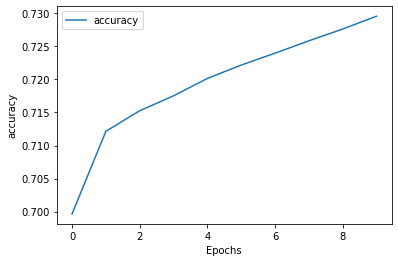

In [39]:
import matplotlib.pyplot as plt


def plot_graphs(history, metric):
  plt.plot(history.history[metric])
#   plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

plot_graphs(history,'accuracy')

In [41]:
model.evaluate(valid_tf_dataset)

Consider rewriting this model with the Functional API.
1264/1264 [==============================] - 12s 6ms/step - loss: 0.5124 - accuracy: 0.7364


[0.5124017596244812, 0.7364411950111389]

In [44]:
for (text1,text2),label in valid_tf_dataset.take(1):
    print(len(text1), label.shape)
    print(text1[0], text2[0], label[0])

64 (64,)
tf.Tensor(b'how has stephen hawking survived with als for so long', shape=(), dtype=string) tf.Tensor(b'how does stephen hawking laugh', shape=(), dtype=string) tf.Tensor(0, shape=(), dtype=int32)


In [95]:
np.argmax(model.predict((text1,text2)), axis=-1), label
m1 = model.predict_classes((text1,text2)).reshape(1,-1)[0]; m2 = label

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [100]:
# sns.lineplot(x = np.arange(m1[0].shape[1]), y=m1[0])
mean_squared_error(m2.numpy(),m1)
# m1.shape,m2.shape

m2.numpy(),m1

(array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
        1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
        0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0],
       dtype=int32),
 array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
       dtype=int32))